In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models,optimizers,datasets,layers,losses
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ECGdataset(Ass4)/ecg_autoencoder_dataset.csv',header=None)
x=data.drop(140,axis=1)
y=pd.DataFrame(data[140])
x=x.values
y=y.values

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
scaler=MinMaxScaler(feature_range=(0,1))
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [4]:
encoder=models.Sequential([ 
            layers.Dense(128,activation="relu"),
            layers.Dense(64,activation="relu"),
            layers.Dense(32,activation="relu"),
            layers.Dense(8,activation="relu")
        ])
decoder=models.Sequential([ 
            layers.Dense(8,activation="relu"),
            layers.Dense(32,activation="relu"),
            layers.Dense(64,activation="relu"),
            layers.Dense(x_train.shape[1],activation="sigmoid")
        ])
model=models.Sequential([encoder,decoder])
model.compile(loss="msle",metrics=["accuracy","msle"],optimizer=optimizers.Adam(0.01))
tf=model.fit(x_train,x_train,validation_data=(x_test,x_test),epochs=200)


Epoch 1/200


125/125 [==============================] - 5s 9ms/step - loss: 0.0033 - accuracy: 0.2464 - msle: 0.0033 - val_loss: 0.0018 - val_accuracy: 0.4190 - val_msle: 0.0018
Epoch 2/200
125/125 [==============================] - 1s 5ms/step - loss: 0.0016 - accuracy: 0.4337 - msle: 0.0016 - val_loss: 0.0017 - val_accuracy: 0.4720 - val_msle: 0.0017
Epoch 3/200
125/125 [==============================] - 1s 5ms/step - loss: 0.0015 - accuracy: 0.4575 - msle: 0.0015 - val_loss: 0.0014 - val_accuracy: 0.4840 - val_msle: 0.0014
Epoch 4/200
125/125 [==============================] - 1s 5ms/step - loss: 0.0013 - accuracy: 0.4617 - msle: 0.0013 - val_loss: 0.0013 - val_accuracy: 0.5030 - val_msle: 0.0013
Epoch 5/200
125/125 [==============================] - 1s 5ms/step - loss: 0.0012 - accuracy: 0.4647 - msle: 0.0012 - val_loss: 0.0013 - val_accuracy: 0.5010 - val_msle: 0.0013
Epoch 6/200
125/125 [==============================] - 1s 5ms/step - loss: 0.0012 - accuracy: 0.4872 - msle: 0.0

dict_keys(['loss', 'accuracy', 'msle', 'val_loss', 'val_accuracy', 'val_msle'])


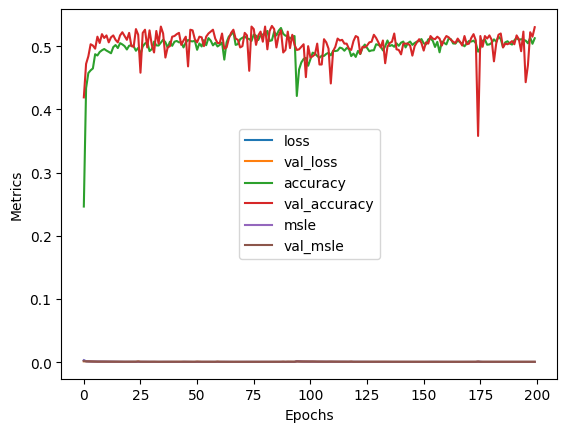

In [5]:
print(tf.history.keys())
plt.plot(tf.history['loss'])
plt.plot(tf.history['val_loss'])
plt.plot(tf.history['accuracy'])
plt.plot(tf.history['val_accuracy'])
plt.plot(tf.history['msle'])
plt.plot(tf.history['val_msle'])
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(['loss', 'val_loss','accuracy','val_accuracy','msle','val_msle'])
plt.show()

In [6]:
preds=model.predict(x_train)
mse=losses.msle(x_train,preds)
threshold=np.mean(mse)/np.std(mse)
threshold
outliers=losses.msle(x_test,model.predict(x_test))>threshold
print(classification_report(y_test,outliers,zero_division=False))

32/32 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.42      1.00      0.59       422
           1       0.00      0.00      0.00       578

    accuracy                           0.42      1000
   macro avg       0.21      0.50      0.30      1000
weighted avg       0.18      0.42      0.25      1000

